# Clasificacion y extraccion de datos de componentes de PC

Este cuaderno integra dos funcionalidades principales:
1.  **Reconocimiento Optico de Caracteres (OCR):** Utilizando `easyocr`, usando el cuaderno del compañero Alejandro como guia, para extraer texto tecnico (marca, modelo, especificaciones) de una imagen nueva.

2.  **Clasificación de imagenes:** Utilizando el modelo pre-entrenado `components_pc_model.keras`, realizado por el compañero Alvaro, para predecir que tipo de componente es.

El flujo de trabajo incluye la carga de una imagen externa, su preprocesamiento (redimensionamiento, conversión a escala de grises y vectorización) y la presentación de resultados mediante texto y gráficos estadísticos.

### 👨‍💻 Autores del proyecto

* [Alejandro Barrionuevo Rosado](https://github.com/Alejandro-BR)
* [Alvaro López Guerrero](https://github.com/Alvalogue72)
* [Andrei Munteanu Popa](https://github.com/andu8705)

Máster de FP en Inteligencia Artifical y Big Data - CPIFP Alan Turing - `Curso 2025/2026`

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import easyocr
import tensorflow as tf
from tensorflow.keras.models import load_model

2026-02-01 02:56:07.040335: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-02-01 02:56:07.081776: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-02-01 02:56:07.995175: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [ ]:
# Definicion de las clases del modelo (basado en el entrenamiento previo)
label_map = {
    0: 'motherboard',
    1: 'gpu',
    2: 'cpu',
    3: 'hard_drive',
    4: 'ram',
    5: 'pc_case',
    6: 'power_supply',
    7: 'liquid_cooling',
    8: 'case_fan',
    9: 'cpu_fan',
    10: 'sound_card'
}

translation_map = {
    'motherboard': 'Placa base',
    'gpu': 'Tarjeta grafica (GPU)',
    'cpu': 'Procesador (CPU)',
    'hard_drive': 'Disco duro / SSD',
    'ram': 'Memoria RAM',
    'pc_case': 'Torre / Caja PC',
    'power_supply': 'Fuente de alimentacion',
    'liquid_cooling': 'Refrigeracion Liquida',
    'case_fan': 'Ventilador de caja',
    'cpu_fan': 'Disipador / Ventilador CPU',
    'sound_card': 'Tarjeta de sonido'
}

# Importacion del modelo entrenado por Alvaro
modelo_ruta = 'components_pc_model.keras'

### Función `process_images`

Esta función es una adaptación de la función `process_images` utilizada durante el entrenamiento. Se encarga de:
1.  Cargar la imagen desde la ruta especificada.

2.  Redimensionarla al tamaño que espera el modelo.

3.  **Convertirla a escala de grises** (requisito específico para la clasificación en este paso).

4.  Vectorizarla y normalizarla (valores entre 0 y 1).

5.  Expandir las dimensiones para que coincida con el formato de entrada del modelo (batch size).

In [ ]:
def process_images(image_path):
    try:
        img = cv2.imread(image_path)
        if img is None:
            return None
        
        img_resized = cv2.resize(img, (230, 230))
        
        # Conversion a escala de grises antes de entregar al modelo
        img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
        
        # Normalizacion y vectorizacion
        img_array = img_gray.astype('float32') / 255.0
        
        # Expandir dimensiones (1, 230, 230, 1)
        img_processed = np.expand_dims(img_array, axis=0)
        img_processed = np.expand_dims(img_processed, axis=-1)
        
        return img_processed
    
    except:
        print(f"Error procesando la imagen en {image_path}.")
        return None

### Carga del modelo y del lector OCR

A continuacion, cargamos el modelo Keras previamente entrenado y la instancia de `easyocr`. Si tienes GPU disponible, el OCR se ejecutará más rápido.

In [4]:
# Cargar el modelo entrenado
try:
    modelo = load_model(modelo_ruta)
except:
    print(f"No se pudo cargar el modelo en {modelo_ruta}.")

# Inicializar EasyOCR
reader = easyocr.Reader(['en'], gpu=True)

I0000 00:00:1769914568.882919    6440 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5578 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3070 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


### Clasificacion y extraccion de Informacion

En este bloque definimos la ruta de la imagen a analizar (`ruta_imagen`) y ejecutamos todo el flujo:
1.  **OCR:** Extrae texto de la imagen original.

2.  **Clasificacion:** Predice la categoria del componente usando la imagen en escala de grises.

3.  **Logica de negocio:** Verifica si es un procesador (Intel/AMD) basandose en la prediccion y el texto encontrado.

4.  **Visualizacion:** Muestra la imagen, los datos detectados y una grafica de tarta con las probabilidades de prediccion.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


2026-02-01 02:56:11.560101: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91002


El componente es un: DISCO DURO / SSD
INFORMACION EXTRAIDA (OCR):
      1. (intel;
      2. CoreTm j5-9400
      3. Coffee Lake-R


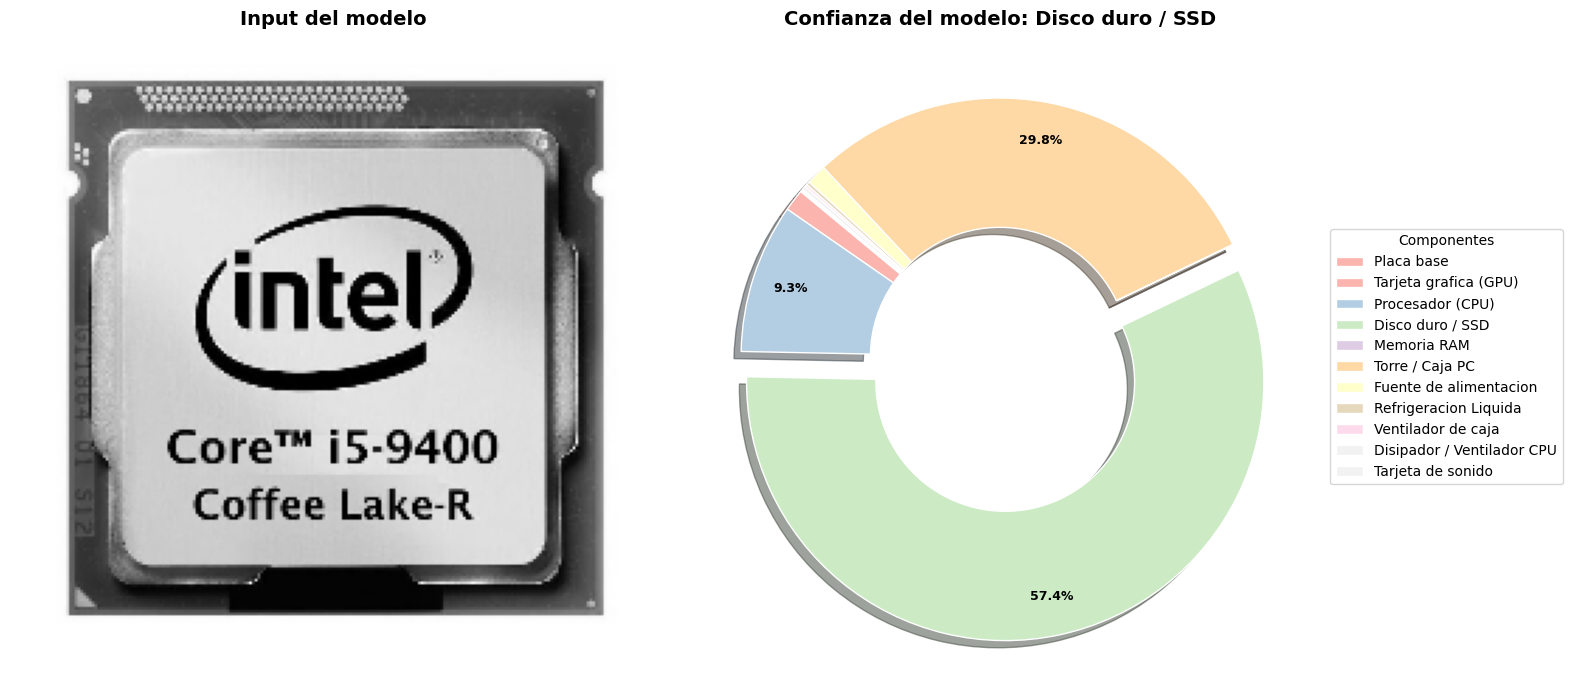

In [ ]:
# Ruta de la imagen a analizar
ruta_imagen = "img/liquida1.jpg" 

# xtraccion de datos con EasyOCR (usando imagen original)
ocr_results = reader.readtext(ruta_imagen, detail=0)
ocr_results_upper = [text.upper() for text in ocr_results]

# Preprocesamiento y clasificacion
processed_img = process_images(ruta_imagen)

if processed_img is not None:
    predictions = modelo.predict(processed_img)
    predicted_index = np.argmax(predictions)
    predicted_label = label_map[predicted_index]

    label_espanol = translation_map[label_map[predicted_index]]
    confidence_scores = predictions[0]

    # Resultado
    print(f"El componente es un: {label_espanol.upper()}")

    # Logica especifica para procesadores
    is_processor = predicted_label == 'cpu'
    found_brand = None
    
    if is_processor:
        if "INTEL" in ocr_results_upper:
            found_brand = "INTEL"
        elif "AMD" in ocr_results_upper:
            found_brand = "AMD"

    print("INFORMACION EXTRAIDA (OCR):")
    
    if not ocr_results:
        print("No se ha detectado ningon dato en la imagen.")
    else:
        data_to_list = ocr_results
        if is_processor and found_brand:
            print(f"El procesador es de la marca {found_brand}.")

            # Filtramos la marca para no repetirla en la lista si se desea, o se imprime todo
            data_to_list = [x for x in ocr_results if x.upper() != found_brand]

        if not data_to_list:
             print("(No hay más datos adicionales).")
        else:
            for i, data in enumerate(data_to_list, 1):
                print(f"      {i}. {data}")

    # Gráfica tipo tarta
    label_espanol_list = [translation_map[label_map[i]] for i in range(len(label_map))]
    explode = [0.1 if i == predicted_index else 0 for i in range(len(confidence_scores))]
    colors = plt.cm.Pastel1(np.linspace(0, 1, len(label_espanol_list)))

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

    img_show = np.squeeze(processed_img)
    ax1.imshow(img_show, cmap='gray')
    ax1.axis('off')
    ax1.set_title("Input del modelo", fontsize=14, fontweight='bold')

    wedges, texts, autotexts = ax2.pie(
        confidence_scores, 
        autopct=lambda p: f'{p:.1f}%' if p > 2 else '',
        startangle=140,
        explode=explode,
        colors=colors,
        pctdistance=0.85,
        shadow=True,
        wedgeprops=dict(width=0.5, edgecolor='w')
    )

    plt.setp(autotexts, size=9, weight="bold", color="black")
    
    ax2.set_title(f"Confianza del modelo: {label_espanol}", fontsize=14, fontweight='bold')
    ax2.legend(wedges, label_espanol_list, title="Componentes", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    
    plt.tight_layout()
    plt.show()
else:
    print(f"Error al cargar la imagen en {ruta_imagen}.")